In [116]:
!ls *.ipynb

Charecter_Movie_4035_Data_주연_조연_Processing.ipynb
Genre_Plot_Processing.ipynb
Genre_Processing.ipynb
MBTI_Character_duplicate_processing.ipynb
MBTI_X_Enneagram_18x18_matrix.ipynb
Recommend_Data_Processing.ipynb
Watch_link.ipynb
movie_select.ipynb
pca_plot.ipynb


In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('content_based_4035.csv')
cdf = pd.read_csv('charator_df.csv')

## movie popular 처리

In [180]:
def convert_pop2num(num_str):
    num_str = num_str.replace(',','')
    if num_str=='no_data':
        return 'no_data'
    if num_str.endswith('만'):
        return int(float(num_str[:-1])*10000)
    else:
        return int(num_str)

In [181]:
df['npop'] = df.popular.map(convert_pop2num)

In [182]:
df[df.npop!='no_data'].npop.astype(int).describe()

count    3.677000e+03
mean     6.107135e+04
std      1.594604e+05
min      1.000000e+00
25%      7.740000e+02
50%      6.628000e+03
75%      4.000000e+04
max      1.850000e+06
Name: npop, dtype: float64

<AxesSubplot: xlabel='npop', ylabel='Density'>

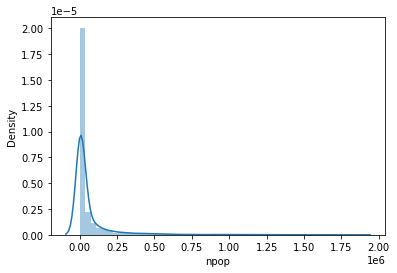

In [183]:
sns.distplot(df[df.npop!='no_data'].npop.astype(int))

## movie yaer

In [270]:
df.year.value_counts()[:10]

no_data    306
2021       212
2020       181
2019       181
2018       175
2022       161
2017       157
2016       146
2011       121
2015       120
Name: year, dtype: int64

<AxesSubplot: xlabel='year', ylabel='Density'>

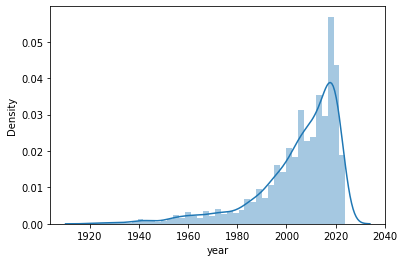

In [185]:
sns.distplot(df[df.year!='no_data'].year)

In [186]:
df[:3]

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop
0,Moana (2016),모아나,2016,미국,애니메이션/모험/코미디/가족/판타지/뮤지컬,"바다가 선택한 소녀, 모아나. 저주에 걸린 모투누이 섬을 구하기 위해 머나먼 항해를...",3.8,21만,https://an2-img.amz.wtchn.net/image/v2/3eqoRSv...,Moana,"'Animation', 'Adventure', 'Comedy', 'Family', ...","In Ancient Polynesia, when a terrible curse in...","'Ron Clements', 'John Musker', 'Don Hall', 'Ch...","""Auli'i Cravalho"", 'Dwayne Johnson', 'Rachel H...",73141,210000
1,Inside Out (2015),인사이드 아웃,2015,미국,코미디/가족/드라마/판타지/애니메이션/모험,모든 사람의 머릿속에 존재하는 감정 컨트롤 본부. 그곳에서 불철주야 열심히 일하는 ...,4.1,79만,https://an2-img.amz.wtchn.net/image/v2/o-maJ99...,Inside Out,"'Animation', 'Adventure', 'Comedy', 'Drama', '...",After young Riley is uprooted from her Midwest...,"'Pete Docter', 'Ronnie Del Carmen'","'Amy Poehler', 'Phyllis Smith', 'Richard Kind'...",122470,790000
2,Zootopia (2016),주토피아,2016,미국,모험/애니메이션/액션/코미디/가족/키즈,교양 있고 세련된 라이프 스타일을 주도하는 도시 주토피아. 이 곳을 단숨에 혼란에 ...,4.2,92만,no image,Zootopia,"'Animation', 'Adventure', 'Comedy', 'Crime', '...","In a city of anthropomorphic animals, a rookie...","'Byron Howard', 'Rich Moore', 'Jared Bush'","'Ginnifer Goodwin', 'Jason Bateman', 'Idris El...",152081,920000


In [187]:
df['contents_year']=np.nan

In [188]:
cond = df.Contents.str.extract(r'(\(\d+\))')[0].notna()
contents_year = df[cond].Contents.str.extract(r'(\(\d+\))')[0].map(lambda x: x[1:-1])

In [189]:
df.contents_year = df.contents_year.fillna(contents_year)

In [190]:
df.contents_year = df.contents_year.fillna(df.year)

In [191]:
df.contents_year.value_counts()[:15]

2021       222
2019       189
2020       186
2018       183
2022       177
2017       163
2016       151
2015       124
2011       122
2014       120
2009       116
2013       115
no_data    110
2007       102
2012       102
Name: contents_year, dtype: int64

In [192]:
# contents year와 year가 다른애들
df_year_diff = df[df.year != df.contents_year].reset_index(drop=True)
df_year_diff[df_year_diff.year!='no_data'].shape

(49, 17)

In [193]:
df_year = df[df.contents_year!='no_data'].reset_index(drop=True)
df_no_year = df[df.contents_year=='no_data'].reset_index(drop=True)

In [271]:
df_year.shape, df_no_year.shape

((3925, 17), (110, 17))

In [275]:
df_year[df_year.npop!='no_data'].shape, df_year[df_year.npop=='no_data'].shape

((3674, 17), (251, 17))

In [194]:
df_year.contents_year = df_year.contents_year.astype(int)

In [211]:
df_year_bf2000 = df_year[(df_year.contents_year<2000) & (df_year.npop!='no_data')]
df_year_bf2000.shape

(995, 17)

In [281]:
df_year_af2000 = df_year[(df_year.contents_year>=2000) & (df_year.npop!='no_data')]
df_year_af2000.shape

(2679, 17)

In [237]:
df_year_bf2000[df_year_bf2000.npop>=100000].shape

(107, 17)

In [256]:
df_year_bf2000[df_year_bf2000.npop>=100000].sort_values('npop',ascending=False)[:10]

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
193,Titanic (1997),타이타닉,1997,미국,드라마/로맨스,이 세상 마지막 순간까지 같이하는 사랑,4.3,103만,https://an2-img.amz.wtchn.net/image/v2/wnJxUuy...,Titanic,"'Drama', 'Romance'",A seventeen-year-old aristocrat falls in love ...,'James Cameron',"'Leonardo DiCaprio', 'Kate Winslet', 'Billy Za...",1721,1030000,1997
746,The Truman Show (1998),트루먼 쇼,1998,미국,코미디/드라마,트루먼 버뱅크는 작고 조용한 섬마을에 사는 평범한 세일즈맨이다. 그런 그가 자신의 ...,4.3,88만,https://an2-img.amz.wtchn.net/image/v2/ZbX0eKc...,The Truman Show,"'Comedy', 'Drama'",An insurance salesman discovers his whole life...,'Peter Weir',"'Jim Carrey', 'Laura Linney', 'Noah Emmerich',...",1682,880000,1998
2323,The Shawshank Redemption (1994),쇼생크 탈출,1994,미국,드라마,두려움은 너를 죄수로 가두고,4.4,81만,https://an2-img.amz.wtchn.net/image/v2/32IAJ_E...,The Shawshank Redemption,'Drama',Two imprisoned men bond over a number of years...,'Frank Darabont',"'Tim Robbins', 'Morgan Freeman', 'Bob Gunton',...",318,810000,1994
2574,Léon: The Professional (1994),레옹,1994,"프랑스,미국",액션/범죄/드라마/스릴러,“나도 행복해 지고 싶어.,4.2,72만,https://an2-img.amz.wtchn.net/image/v2/-84JBPw...,Léon: The Professional,"'Action', 'Crime', 'Drama', 'Thriller'",12-year-old Mathilda is reluctantly taken in b...,'Luc Besson',"'Jean Reno', 'Gary Oldman', 'Natalie Portman',...",293,720000,1994
4,Dead Poets Society (1989),죽은 시인의 사회,1989,미국,드라마,"“오 캡틴, 나의 캡틴”",4.2,63만,https://an2-img.amz.wtchn.net/image/v2/Z9BhW72...,Dead Poets Society,"'Comedy', 'Drama'",Maverick teacher John Keating uses poetry to e...,'Peter Weir',"'Robin Williams', 'Robert Sean Leonard', 'Etha...",1246,630000,1989
3832,Society (1989),죽은 시인의 사회,1989,미국,드라마,"“오 캡틴, 나의 캡틴”",4.2,63만,https://an2-img.amz.wtchn.net/image/v2/Z9BhW72...,Society,"'Comedy', 'Horror'",An ordinary teenage boy discovers his family i...,'Brian Yuzna',"'Billy Warlock', ""Concetta D'Agnese"", 'Ben Sla...",5606,630000,1989
775,Notting Hill (1999),노팅 힐,1999,영국,로맨스/로맨틱 코미디,윌리엄 태커(휴 그랜트분)는 웨스트 런던의 ‘노팅 힐’에 사는 소심한 남자. 역시 ...,4.0,57만,https://an2-img.amz.wtchn.net/image/v2/h-rRCA7...,Notting Hill,"'Comedy', 'Drama', 'Romance'",NaN,'Roger Michell',"'Julia Roberts', 'Hugh Grant', 'Richard McCabe...",2671,570000,1999
89,Forrest Gump (1994),포레스트 검프,1994,미국,드라마/로맨스,"""인생은 초콜릿 상자와 같은 거야. 네가 무엇을 고를지 아무도 모른단다…""",4.3,57만,https://an2-img.amz.wtchn.net/image/v2/3CYqWvs...,Forrest Gump,"'Drama', 'Romance'","The presidencies of Kennedy and Johnson, the V...",'Robert Zemeckis',"'Tom Hanks', 'Rebecca Williams', 'Sally Field'...",356,570000,1994
953,The Sixth Sense (1999),식스 센스,1999,미국,드라마/스릴러/공포/미스터리,아동 심리학자 말콤 크로우(Malcolm Crowe: 브루스 윌리스 분)는 자신에게...,4.1,56만,https://an2-img.amz.wtchn.net/image/v2/OwQl5Sl...,The Sixth Sense,"'Drama', 'Mystery', 'Thriller'","A frightened, withdrawn Philadelphia boy who c...",'M. Night Shyamalan',"'Bruce Willis', 'Haley Joel Osment', 'Toni Col...",197499,560000,1999
302,Mulan (1998),뮬란,1998,미국,애니메이션/모험/가족/뮤지컬/전쟁/코미디/키즈,"파씨 가문의 말썽꾸러기 외동딸 뮬란은 선머슴 같은 성격에 강한 자아를 가지고 있어,...",3.9,55만,https://an2-img.amz.wtchn.net/image/v2/3o_2J2g...,Mulan,"'Animation', 'Adventure', 'Comedy', 'Family', ...","To save her father from death in the army, a y...","'Tony Bancroft', 'Barry Cook'","'Miguel Ferrer', 'Harvey Fierstein', 'Freda Fo...",300075,550000,1998


In [261]:
df_year_bf2000_select = df_year_bf2000[df_year_bf2000.npop>=100000].reset_index(drop=True)
df_year_bf2000_select.shape

(107, 17)

In [277]:
df_year_af2000 = df_year[(df_year.contents_year>=2000) & (df_year.npop!='no_data')]
df_year_af2000.shape

(2679, 17)

In [279]:
df_year_af2000_select = df_year_af2000[df_year_af2000.npop>=10000].reset_index(drop=True)

In [280]:
print(df_year_af2000_select.shape)
df_year_af2000_select[:5]

(1259, 17)


,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
0,Moana (2016),모아나,2016,미국,애니메이션/모험/코미디/가족/판타지/뮤지컬,"바다가 선택한 소녀, 모아나. 저주에 걸린 모투누이 섬을 구하기 위해 머나먼 항해를...",3.8,21만,https://an2-img.amz.wtchn.net/image/v2/3eqoRSv...,Moana,"'Animation', 'Adventure', 'Comedy', 'Family', ...","In Ancient Polynesia, when a terrible curse in...","'Ron Clements', 'John Musker', 'Don Hall', 'Ch...","""Auli'i Cravalho"", 'Dwayne Johnson', 'Rachel H...",73141,210000,2016
1,Inside Out (2015),인사이드 아웃,2015,미국,코미디/가족/드라마/판타지/애니메이션/모험,모든 사람의 머릿속에 존재하는 감정 컨트롤 본부. 그곳에서 불철주야 열심히 일하는 ...,4.1,79만,https://an2-img.amz.wtchn.net/image/v2/o-maJ99...,Inside Out,"'Animation', 'Adventure', 'Comedy', 'Drama', '...",After young Riley is uprooted from her Midwest...,"'Pete Docter', 'Ronnie Del Carmen'","'Amy Poehler', 'Phyllis Smith', 'Richard Kind'...",122470,790000,2015
2,Zootopia (2016),주토피아,2016,미국,모험/애니메이션/액션/코미디/가족/키즈,교양 있고 세련된 라이프 스타일을 주도하는 도시 주토피아. 이 곳을 단숨에 혼란에 ...,4.2,92만,no image,Zootopia,"'Animation', 'Adventure', 'Comedy', 'Crime', '...","In a city of anthropomorphic animals, a rookie...","'Byron Howard', 'Rich Moore', 'Jared Bush'","'Ginnifer Goodwin', 'Jason Bateman', 'Idris El...",152081,920000,2016
3,Legally Blonde (2001),금발이 너무해,2001,미국,로맨스/코미디/로맨틱 코미디/드라마,부유한 집안 출신에 금발과 제법 큰 가슴을 지닌 여학생 클럽 회장 엘 우즈. 세상 ...,3.6,30만,https://an2-img.amz.wtchn.net/image/v2/xSEXNF5...,Legally Blonde,"'Comedy', 'Romance'",NaN,'Robert Luketic',"'Reese Witherspoon', 'Luke Wilson', 'Selma Bla...",4447,300000,2001
4,Coraline (2009),코렐라인: 비밀의 문,2009,미국,애니메이션/드라마/가족/판타지/스릴러/액션/공포/미스터리/모험,"새로운 집으로 이사해 모든 것이 낯선 코렐라인은 부모님도 일 때문에 바쁘자, 혼자 ...",3.8,16만,https://an2-img.amz.wtchn.net/image/v2/GTwZ3A6...,Coraline,"'Animation', 'Drama', 'Family', 'Fantasy', 'Th...",NaN,'Henry Selick',"'Dakota Fanning', 'Teri Hatcher', 'Jennifer Sa...",66097,160000,2009


In [254]:
df_year_af2000[df_year_af2000.npop>=10000].contents_year.value_counts()

2016    81
2011    74
2017    73
2018    67
2009    65
2007    65
2013    64
2015    64
2012    61
2014    61
2004    60
2008    58
2010    56
2019    56
2005    51
2006    48
2003    43
2021    42
2002    41
2001    33
2020    31
2022    26
Name: contents_year, dtype: int64

In [269]:
df_no_year.shape

(110, 17)

In [283]:
df_no_year_select = df_no_year[df_no_year.npop!='no_data'].reset_index(drop=True)
df_no_year_select

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
0,Now You See Me (Franchise),나우 유 씨 미 3,no_data,미국,범죄/스릴러,<나우 유 씨 미>의 세 번째 시리즈.,4.0,30,no image,Now You See Me,"'Crime', 'Mystery', 'Thriller'",An F.B.I. Agent and an Interpol Detective trac...,'Louis Leterrier',"'Jesse Eisenberg', 'Mark Ruffalo', 'Woody Harr...",102903,30,no_data
1,Bill & Ted (Franchise),킬빌 3,no_data,no_data,no_data,-,3.7,42,no image,Bill & Ted Face the Music,"'Adventure', 'Comedy', 'Music', 'Sci-Fi'",Once told they'd save the universe during a ti...,'Dean Parisot',"'Keanu Reeves', 'Alex Winter', 'Kristen Schaal...",4571,42,no_data
2,Sherlock Holmes,셜록홈즈 3,no_data,no_data,미스터리/범죄/액션,-,3.6,7,no image,Sherlock Holmes,"'Action', 'Adventure', 'Mystery'",NaN,'Guy Ritchie',"'Robert Downey Jr.', 'Jude Law', 'Rachel McAda...",73017,7,no_data


In [291]:
df_select = pd.concat([df_year_af2000_select,df_year_bf2000_select,df_no_year_select]).reset_index(drop=True)
df_select.shape

(1369, 17)

## Character df 전처리

In [37]:
cdf.MBTI.value_counts()

ESTP    1808
ISFP    1757
ESTJ    1706
ISTP    1617
ISTJ    1592
INFP    1559
ISFJ    1541
ESFP    1533
ENTJ    1521
ENTP    1393
ESFJ    1378
INFJ    1328
INTJ    1291
ENFP    1280
ENFJ    1235
INTP    1234
XXXX     540
Name: MBTI, dtype: int64

In [393]:
cdf2 = cdf.copy()
cdf.shape

(24313, 8)

In [394]:
cdf2 = cdf2[cdf2.MBTI!='XXXX'].reset_index(drop=True)
cdf2.shape

(23773, 8)

In [395]:
cdf2 = cdf2[cdf2.Enneagram!='XwX'].reset_index(drop=True)
cdf2.shape

(22053, 8)

In [396]:
## Empty 이미지 제거
empty_img_src = 'https://pdb-web-static.s3.us-east-2.amazonaws.com/avatars/profile_avatar.png'

In [397]:
cdf2 = cdf2[cdf2.img_src!=empty_img_src]
cdf2.shape

(20771, 8)

In [398]:
cdf2[cdf2.duplicated(subset=['Character','Contents','MBTI','Enneagram'],keep=False)].sort_values('Character')

,Character,Contents,Votes,MBTI,Enneagram,img_src,CharacterId,movieId
7095,"""Arthur Slugworth""",Willy Wonka and the Chocolate Factory (1971),12/3,INTJ,4w5,https://static1.personality-database.com/profi...,7731,176299.0
7075,"""Arthur Slugworth""",Willy Wonka and the Chocolate Factory (1971),12/3,INTJ,4w5,https://static1.personality-database.com/profi...,7709,176299.0
2206,"""Iris""",The Midnight Sky (2020),15/1,INFP,4w5,https://static1.personality-database.com/profi...,2399,300268.0
2181,"""Iris""",The Midnight Sky (2020),15/1,INFP,4w5,https://static1.personality-database.com/profi...,2374,300268.0
18320,"""Joliet"" Jake Blues",The Blues Brothers (1980),33/0,ESTP,8w7,https://static1.personality-database.com/profi...,20191,1220.0
...,...,...,...,...,...,...,...,...
12356,Яна Семакина,Univer. New Dorm,31/0,ISFJ,1w2,https://static1.personality-database.com/profi...,13568,300041.0
14704,भालू (Baloo),The Jungle Book (1967),162/6,ESFP,9w8,https://static1.personality-database.com/profi...,16227,137857.0
14703,भालू (Baloo),The Jungle Book (1967),162/6,ESFP,9w8,https://static1.personality-database.com/profi...,16226,137857.0
17487,“Herm” Stockburn,The Ridiculous 6,8/0,ISFP,9w8,https://static1.personality-database.com/profi...,19304,148652.0


In [399]:
cdf2 = cdf2.drop_duplicates(subset=['Character','Contents','MBTI','Enneagram']).reset_index(drop=True)
cdf2.shape

(18044, 8)

## Votes

In [32]:
# Votes에 모두 '/' 가 포함됨을 확인
cdf[cdf.Votes.str.contains('/')].shape

(24313, 9)

In [400]:
def convert_str2num(num_str):
    num_str = num_str.split('/')[0]
    if num_str.endswith('k'):
        return int(float(num_str[:-1])*1000)
    else:
        return int(num_str)

In [401]:
cdf2['vote'] = cdf2.Votes.map(convert_str2num)

In [402]:
cdf2.vote.describe()

count    18044.000000
mean        99.391487
std        302.983949
min          5.000000
25%         14.000000
50%         27.000000
75%         68.000000
max       7300.000000
Name: vote, dtype: float64

<AxesSubplot: ylabel='Frequency'>

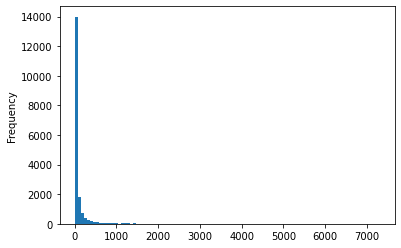

In [403]:
cdf2.vote.plot(kind='hist',bins=100)

In [404]:
cdf_top = cdf2.sort_values('vote',ascending=False).groupby('movieId').head(3).reset_index(drop=True)
cdf_top

,Character,Contents,Votes,MBTI,Enneagram,img_src,CharacterId,movieId,vote
0,Bruno Madrigal,Encanto (2021),7.3k/1.5k,ISFJ,6w5,https://static1.personality-database.com/profi...,13078,300005.0,7300
1,Tyler Durden,Fight Club (1999),6.9k/2.9k,ESTP,8w7,https://static1.personality-database.com/profi...,19465,2959.0,6900
2,Elsa,Frozen (Franchise),6.2k/2.9k,INFJ,1w9,https://static1.personality-database.com/profi...,22947,75395.0,6200
3,Hermione Granger,Harry Potter / Wizarding World Films,6.2k/830,ESTJ,1w2,https://static1.personality-database.com/profi...,11322,69844.0,6200
4,Loki Laufeyson,Avengers,6k/1.3k,INFJ,4w3,https://static1.personality-database.com/profi...,22948,300932.0,6000
...,...,...,...,...,...,...,...,...,...
7969,Rovach Alimov,6 Underground (2019),5/0,ESTJ,3w4,https://static1.personality-database.com/profi...,13029,300771.0,5
7970,Joan Carlyle,Ice Princess (2005),5/0,ESTJ,3w4,https://static1.personality-database.com/profi...,13051,32289.0,5
7971,"Lornette ""Mace"" Mason",Strange Days (1995),5/0,ESTJ,8w9,https://static1.personality-database.com/profi...,13058,198.0,5
7972,Patches O'Houlihan,Dodgeball (2004),5/0,ESTJ,3w4,https://static1.personality-database.com/profi...,13059,8528.0,5


<AxesSubplot: xlabel='vote', ylabel='Density'>

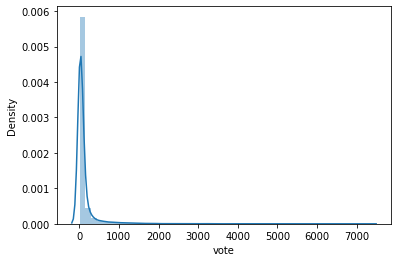

In [405]:
sns.distplot(cdf_top.vote)

In [406]:
cdf_top.movieId.nunique()

3558

In [407]:
character_movieIds = sorted(set(cdf_top.movieId))
len(character_movieIds)

3558

In [408]:
df_select.shape

(1369, 17)

In [409]:
df_select_common = df_select[df_select.movieId.isin(character_movieIds)].reset_index(drop=True)
df_select_common.shape

(1282, 17)

In [410]:
cdf_top_common = cdf_top[cdf_top.movieId.isin(df_select_common.movieId)].reset_index(drop=True)
cdf_top_common.shape

(3144, 9)

In [321]:
cdf_top_common.movieId = cdf_top_common.movieId.astype(int)

In [411]:
cdf_top_common[:3]

,Character,Contents,Votes,MBTI,Enneagram,img_src,CharacterId,movieId,vote
0,Bruno Madrigal,Encanto (2021),7.3k/1.5k,ISFJ,6w5,https://static1.personality-database.com/profi...,13078,300005.0,7300
1,Tyler Durden,Fight Club (1999),6.9k/2.9k,ESTP,8w7,https://static1.personality-database.com/profi...,19465,2959.0,6900
2,Elsa,Frozen (Franchise),6.2k/2.9k,INFJ,1w9,https://static1.personality-database.com/profi...,22947,75395.0,6200


In [412]:
df_mid_cid = cdf_top_common.groupby('movieId').Character.count().reset_index()
df_mid_cid[:3]

,movieId,Character
0,1.0,3
1,2.0,3
2,48.0,3


In [413]:
df_select_duple = df_select_common[df_select_common.duplicated(subset=['ko_title','contents_year'],keep=False)].sort_values('ko_title')
print(df_select_duple.shape)
df_select_duple[:3]

(64, 17)


,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
110,8 Mile (2002),8 마일,2002,"미국,독일",드라마/음악,"디트로이트의 소외받은 계층은 생존 그 자체가 삶의 목적이다. 이러한 계층, 특히 빈...",3.8,35만,https://an2-img.amz.wtchn.net/image/v2/79PzPCO...,8 Mile,"'Drama', 'Music'","Follows a young rapper in the Detroit area, st...",'Curtis Hanson',"'Eminem', 'Kim Basinger', 'Mekhi Phifer', 'Bri...",5810,350000,2002
608,8 1/2,8 마일,2002,"미국,독일",드라마/음악,"디트로이트의 소외받은 계층은 생존 그 자체가 삶의 목적이다. 이러한 계층, 특히 빈...",3.8,35만,https://an2-img.amz.wtchn.net/image/v2/79PzPCO...,8 1/2,"'Short', 'Comedy', 'Drama'","Life is hard for an 8½-year-old director.', ""I...",'Bryce Edmonds',"'Lev Cameron', 'Gracie Miller', 'Shae Smolik',...",1251,350000,2002
1055,Nobody (2021),노바디,2021,미국,액션/코미디,정말이지 착하게 살고 싶었다. 참으려고 했다.,3.3,2만,https://an2-img.amz.wtchn.net/image/v2/r_odx7J...,Nobody,"'Action', 'Crime', 'Drama', 'Thriller'",NaN,'Ilya Naishuller',"'Bob Odenkirk', 'Aleksey Serebryakov', 'Connie...",300827,20000,2021


In [414]:
df_select_noduple = df_select_common.drop_duplicates(subset=['ko_title','contents_year'],keep=False)
df_select_noduple.shape

(1218, 17)

In [415]:
cols=['movieId','Contents', 'ko_title', 'Character', 'year', 'rating', 'popular', 'npop', 'contents_year']

df_select_duple2 = df_select_duple.merge(df_mid_cid, how='left', on='movieId')[cols]
select_index=[0, 2, 5, 7, 8, 11, 13, 14, 17, 18, 20, 23, 24, 26, 29, 31, 32, 37,
             38, 40, 43, 45, 46, 48, 51, 52, 54, 59, 60, 63]

In [416]:
df_select_duple3 = df_select_duple2.loc[select_index,:]
df_select_duple3

,movieId,Contents,ko_title,Character,year,rating,popular,npop,contents_year
0,5810,8 Mile (2002),8 마일,3,2002,3.8,35만,350000,2002
2,300827,Nobody (2021),노바디,1,2021,3.3,2만,20000,2021
5,300940,The Batman (2022),더 배트맨,3,2022,3.5,4만,40000,2022
7,185233,The Fall (2006),더 폴: 오디어스와 환상의 문,1,2006,4.0,7만,70000,2006
8,56782,There Will Be Blood (2007),데어 윌 비 블러드,3,2007,4.1,5만,50000,2007
11,300116,Drive My Car,드라이브 마이 카,3,2021,4.0,4만,40000,2021
13,68952,Drag Me To Hell (2009),드래그 미 투 헬,3,2009,2.8,10만,100000,2009
14,140160,Descendants (Franchise),디센던트,3,2011,3.6,2만,20000,2011
17,70286,District 9 (2009),디스트릭트 9,3,2009,3.8,41만,410000,2009
18,95873,Ruby Sparks,루비 스팍스,3,2012,3.6,7만,70000,2012


In [417]:
df_select_duple_last = df_select_duple[df_select_duple.movieId.isin(df_select_duple3.movieId)]
df_select_duple_last.shape

(30, 17)

In [418]:
movie_processed = pd.concat([df_select_noduple,df_select_duple_last])
movie_processed.shape

(1248, 17)

In [419]:
cdf_top_common.shape

(3144, 9)

In [420]:
cdf_processed = cdf_top_common[cdf_top_common.movieId.isin(movie_processed.movieId)]
cdf_processed.shape

(3072, 9)

In [421]:
cols=['movieId','Contents', 'contents_year', 'ko_title', 'year', 'rating', 'popular', 'npop']
movie_processed[cols]

,movieId,Contents,contents_year,ko_title,year,rating,popular,npop
0,73141,Moana (2016),2016,모아나,2016,3.8,21만,210000
1,122470,Inside Out (2015),2015,인사이드 아웃,2015,4.1,79만,790000
2,152081,Zootopia (2016),2016,주토피아,2016,4.2,92만,920000
3,4447,Legally Blonde (2001),2001,금발이 너무해,2001,3.6,30만,300000
4,66097,Coraline (2009),2009,코렐라인: 비밀의 문,2009,3.8,16만,160000
...,...,...,...,...,...,...,...,...
1077,300855,The Chorus (2004),2004,코러스,2004,3.9,13만,130000
93,70008,Kill Your Darlings (2013),2013,킬 유어 달링,2013,3.5,12만,120000
577,8529,The terminal (2004),2004,터미널,2004,4.0,33만,330000
866,300617,Family Man (2000),2000,패밀리 맨,2000,3.8,6만,60000


In [422]:
cdf_processed.columns

Index(['Character', 'Contents', 'Votes', 'MBTI', 'Enneagram', 'img_src',
       'CharacterId', 'movieId', 'vote'],
      dtype='object')

In [432]:
ch_cols = ['Character', 'vote', 'MBTI', 'Enneagram', 'CharacterId', 'movieId']

In [433]:
cdf_movie_merge = cdf_processed[ch_cols].merge(movie_processed[cols], on='movieId', how='left')
cdf_movie_merge

,Character,vote,MBTI,Enneagram,CharacterId,movieId,Contents,contents_year,ko_title,year,rating,popular,npop
0,Bruno Madrigal,7300,ISFJ,6w5,13078,300005.0,Encanto (2021),2021,엔칸토: 마법의 세계,2021,3.5,3만,30000
1,Tyler Durden,6900,ESTP,8w7,19465,2959.0,Fight Club (1999),1999,파이트 클럽,1999,4.1,34만,340000
2,Elsa,6200,INFJ,1w9,22947,75395.0,Frozen (Franchise),2019,겨울왕국 2,2019,3.6,17만,170000
3,Loki Laufeyson,6000,INFJ,4w3,22948,300932.0,Avengers,2012,어벤져스,2012,4.2,185만,1850000
4,Patrick Bateman,6000,ENTJ,3w4,8133,3535.0,American Psycho (2000),2000,아메리칸 사이코,2000,3.7,14만,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,Tony Block,5,INTP,5w6,5392,54995.0,Planet Terror (2007),2007,플래닛 테러,2007,3.4,2만,20000
3068,Horvath,5,ENTJ,3w4,9674,38886.0,The Sorcerer’s Apprentice (2010),2010,마법사의 제자,2010,2.8,10만,100000
3069,Mrs Kehoe,5,ESTJ,3w2,13067,127108.0,Brooklyn (2015),2015,브루클린 나인-나인 시즌 3,2015,4.2,1만,10000
3070,Rovach Alimov,5,ESTJ,3w4,13029,300771.0,6 Underground (2019),2019,6 언더그라운드,2019,2.9,2만,20000


In [434]:
cdf_movie_merge[cdf_movie_merge.Contents.str.contains('The Day After Tomorrow')]

,Character,vote,MBTI,Enneagram,CharacterId,movieId,Contents,contents_year,ko_title,year,rating,popular,npop
1924,"Samuel ""Sam"" Hall",31,INFJ,6w5,23493,191723.0,The Day After Tomorrow (2004),2004,투모로우,2004,3.6,62만,620000
2151,Laura Chapman,24,ENFJ,2w3,471,191723.0,The Day After Tomorrow (2004),2004,투모로우,2004,3.6,62만,620000
3051,Brian Parks,6,INTP,5w6,5302,191723.0,The Day After Tomorrow (2004),2004,투모로우,2004,3.6,62만,620000


In [441]:
cdf_movie_merge_last = cdf_movie_merge[cdf_movie_merge.vote>=10]

In [447]:
cdf_movie_merge_last.shape, cdf_movie_merge_last.movieId.nunique()

((2869, 13), 1193)

In [445]:
cdf_movie_merge_last.groupby("MBTI").Enneagram.nunique()

MBTI
ENFJ    15
ENFP    16
ENTJ    13
ENTP    15
ESFJ    11
ESFP    13
ESTJ     9
ESTP    14
INFJ    16
INFP    15
INTJ    13
INTP    13
ISFJ    12
ISFP    17
ISTJ    14
ISTP    13
Name: Enneagram, dtype: int64

In [443]:
cdf_movie_merge_last.groupby(["MBTI","Enneagram"]).Character.count().reset_index()

,MBTI,Enneagram,Character
0,ENFJ,1w2,15
1,ENFJ,1w9,5
2,ENFJ,2w1,8
3,ENFJ,2w3,35
4,ENFJ,3w2,9
5,ENFJ,3w4,6
6,ENFJ,4w3,4
7,ENFJ,6w5,3
8,ENFJ,6w7,7
9,ENFJ,7w6,4


In [462]:
cdf_movie_merge_last[cdf_movie_merge_last.contents_year=='no_data']

,Character,vote,MBTI,Enneagram,CharacterId,movieId,Contents,contents_year,ko_title,year,rating,popular,npop
155,Sherlock Holmes,979,ENTP,5w6,5417,73017.0,Sherlock Holmes,no_data,셜록홈즈 3,no_data,3.6,7,7
486,Daniel Atlas,262,ENTJ,7w8,8210,102903.0,Now You See Me (Franchise),no_data,나우 유 씨 미 3,no_data,4.0,30,30
594,Professor James Moriarty,201,INTJ,5w6,6926,73017.0,Sherlock Holmes,no_data,셜록홈즈 3,no_data,3.6,7,7
829,Dr. John Watson,124,ISFJ,1w9,13226,73017.0,Sherlock Holmes,no_data,셜록홈즈 3,no_data,3.6,7,7
847,Merritt McKinney,119,ENTP,7w6,5613,102903.0,Now You See Me (Franchise),no_data,나우 유 씨 미 3,no_data,4.0,30,30
852,Jack Wilder,118,ESTP,7w8,19680,102903.0,Now You See Me (Franchise),no_data,나우 유 씨 미 3,no_data,4.0,30,30
1351,Theodore “Ted” Logan,60,ISFP,9w8,18037,4571.0,Bill & Ted (Franchise),no_data,킬빌 3,no_data,3.7,42,42
1580,William “Bill” S. Preston Esquire,46,ENFP,7w6,3301,4571.0,Bill & Ted (Franchise),no_data,킬빌 3,no_data,3.7,42,42
2139,"Wilhelmina ""Billie"" Logan",24,INTP,9w8,4720,4571.0,Bill & Ted (Franchise),no_data,킬빌 3,no_data,3.7,42,42


In [451]:
cdf_movie_merge_last.shape

(2869, 13)

In [464]:
cdf_last = cdf[cdf.CharacterId.isin(cdf_movie_merge_last.CharacterId)].reset_index(drop=True)
movie_last = df[df.movieId.isin(cdf_movie_merge_last.movieId)].reset_index(drop=True)

In [472]:
cdf_movie_merge_last[cdf_movie_merge_last.contents_year=='no_data']

,Character,vote,MBTI,Enneagram,CharacterId,movieId,Contents,contents_year,ko_title,year,rating,popular,npop
155,Sherlock Holmes,979,ENTP,5w6,5417,73017.0,Sherlock Holmes,no_data,셜록홈즈 3,no_data,3.6,7,7
486,Daniel Atlas,262,ENTJ,7w8,8210,102903.0,Now You See Me (Franchise),no_data,나우 유 씨 미 3,no_data,4.0,30,30
594,Professor James Moriarty,201,INTJ,5w6,6926,73017.0,Sherlock Holmes,no_data,셜록홈즈 3,no_data,3.6,7,7
829,Dr. John Watson,124,ISFJ,1w9,13226,73017.0,Sherlock Holmes,no_data,셜록홈즈 3,no_data,3.6,7,7
847,Merritt McKinney,119,ENTP,7w6,5613,102903.0,Now You See Me (Franchise),no_data,나우 유 씨 미 3,no_data,4.0,30,30
852,Jack Wilder,118,ESTP,7w8,19680,102903.0,Now You See Me (Franchise),no_data,나우 유 씨 미 3,no_data,4.0,30,30
1351,Theodore “Ted” Logan,60,ISFP,9w8,18037,4571.0,Bill & Ted (Franchise),no_data,킬빌 3,no_data,3.7,42,42
1580,William “Bill” S. Preston Esquire,46,ENFP,7w6,3301,4571.0,Bill & Ted (Franchise),no_data,킬빌 3,no_data,3.7,42,42
2139,"Wilhelmina ""Billie"" Logan",24,INTP,9w8,4720,4571.0,Bill & Ted (Franchise),no_data,킬빌 3,no_data,3.7,42,42


In [656]:
cdf_movie_merge_last.columns

Index(['Character', 'vote', 'MBTI', 'Enneagram', 'CharacterId', 'movieId',
       'Contents', 'contents_year', 'ko_title', 'year', 'rating', 'popular',
       'npop'],
      dtype='object')

In [661]:
ncols = ['CharacterId', 'Character', 'vote', 'MBTI', 'Enneagram', 'movieId', 'contents_year', 'Contents','ko_title', 'rating', 'npop']

In [662]:
cdf_movie_merge_last[ncols].to_pickle('../../Utils/Pickle/230203_character_movie_merge.pickle')

In [477]:
movie_last[movie_last.contents_year=='no_data']

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
337,Now You See Me (Franchise),나우 유 씨 미 3,no_data,미국,범죄/스릴러,<나우 유 씨 미>의 세 번째 시리즈.,4.0,30,no image,Now You See Me,"'Crime', 'Mystery', 'Thriller'",An F.B.I. Agent and an Interpol Detective trac...,'Louis Leterrier',"'Jesse Eisenberg', 'Mark Ruffalo', 'Woody Harr...",102903,30,no_data
469,Bill & Ted (Franchise),킬빌 3,no_data,no_data,no_data,-,3.7,42,no image,Bill & Ted Face the Music,"'Adventure', 'Comedy', 'Music', 'Sci-Fi'",Once told they'd save the universe during a ti...,'Dean Parisot',"'Keanu Reeves', 'Alex Winter', 'Kristen Schaal...",4571,42,no_data
720,Sherlock Holmes,셜록홈즈 3,no_data,no_data,미스터리/범죄/액션,-,3.6,7,no image,Sherlock Holmes,"'Action', 'Adventure', 'Mystery'",NaN,'Guy Ritchie',"'Robert Downey Jr.', 'Jude Law', 'Rachel McAda...",73017,7,no_data


In [478]:
movie_last.loc[movie_last.contents_year=='no_data','ko_title'] = ['나우 유 씨 미 2','킬빌 2','셜록홈즈 2']
movie_last.loc[movie_last.contents_year=='no_data','contents_year'] = [2016, 2004, 2011]

In [480]:
movie_last[movie_last.movieId.isin([102903,4571,73017])]

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
337,Now You See Me (Franchise),나우 유 씨 미 2,no_data,미국,범죄/스릴러,<나우 유 씨 미>의 세 번째 시리즈.,4.0,30,no image,Now You See Me,"'Crime', 'Mystery', 'Thriller'",An F.B.I. Agent and an Interpol Detective trac...,'Louis Leterrier',"'Jesse Eisenberg', 'Mark Ruffalo', 'Woody Harr...",102903,30,2016
469,Bill & Ted (Franchise),킬빌 2,no_data,no_data,no_data,-,3.7,42,no image,Bill & Ted Face the Music,"'Adventure', 'Comedy', 'Music', 'Sci-Fi'",Once told they'd save the universe during a ti...,'Dean Parisot',"'Keanu Reeves', 'Alex Winter', 'Kristen Schaal...",4571,42,2004
720,Sherlock Holmes,셜록홈즈 2,no_data,no_data,미스터리/범죄/액션,-,3.6,7,no image,Sherlock Holmes,"'Action', 'Adventure', 'Mystery'",NaN,'Guy Ritchie',"'Robert Downey Jr.', 'Jude Law', 'Rachel McAda...",73017,7,2011


In [484]:
movie_last.contents_year =  movie_last.contents_year.astype(int)

In [490]:
movie_last.contents_year.value_counts()

2016    71
2011    68
2017    66
2015    60
2013    56
2014    56
2009    56
2004    54
2007    53
2012    53
2019    51
2018    51
2008    47
2006    43
2010    43
2005    42
2002    37
2003    36
2000    35
2021    35
2001    29
2020    27
2022    22
1997    15
1998    10
1999    10
1994     9
1996     8
1995     7
1990     7
1993     6
1992     5
1989     3
1991     3
1961     2
1984     2
1988     2
1980     2
1939     1
1937     1
1982     1
1973     1
1965     1
1936     1
1971     1
1975     1
1953     1
1968     1
1972     1
Name: contents_year, dtype: int64

## 1988년도 이전 영화들

In [485]:
movie_last[movie_last.contents_year<=1988]

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
35,The Shining (1980),샤이닝,1980,"영국,미국",공포/스릴러,겨울 동안 호텔을 관리하며 느긋하게 소설을 쓸 수 있는 기회를 잡은 ‘잭’은 가족들...,3.9,12만,https://an2-img.amz.wtchn.net/image/v2/GDhFcgm...,The Shining,"'Drama', 'Horror'",A family heads to an isolated hotel for the wi...,'Stanley Kubrick',"'Jack Nicholson', 'Shelley Duvall', 'Danny Llo...",180263,120000,1980
61,Snow White and the Seven Dwarfs (1937),백설공주와 일곱 난쟁이,1937,미국,애니메이션/가족/판타지/뮤지컬/로맨스,"아주 먼 옛날, 왕비는 뱃속의 아이가 눈처럼 하얀 피부에 사과처럼 붉은 입술, 장미...",3.7,11만,https://an2-img.amz.wtchn.net/image/v2/yfB1M_C...,Snow White and the Seven Dwarfs,"'Animation', 'Adventure', 'Family', 'Fantasy',...",Exiled into the dangerous forest by her wicked...,"'William Cottrell', 'David Hand', 'Wilfred Jac...","'Roy Atwell', 'Stuart Buchanan', 'Adriana Case...",594,110000,1937
212,Gone with the Wind (1939),바람과 함께 사라지다,1939,미국,드라마/역사/로맨스/전쟁/액션,“내일은 내일의 태양이 뜬다”,4.0,13만,https://an2-img.amz.wtchn.net/image/v2/QNw0xpJ...,Gone with the Wind,"'Drama', 'Romance', 'War'",NaN,"'Victor Fleming', 'George Cukor', 'Sam Wood'","'Thomas Mitchell', ""Barbara O'Neil"", 'Vivien L...",920,130000,1939
216,The Godfather (1972),대부,1972,미국,범죄/드라마,마피아의 대부 돈 꼴레오네의 호화 저택에서 막내딸 코니의 결혼식이 열린다. 시실리에...,4.3,25만,https://an2-img.amz.wtchn.net/image/v2/T8MdTHe...,The Godfather,"'Crime', 'Drama'",The aging patriarch of an organized crime dyna...,'Francis Ford Coppola',"'Marlon Brando', 'Al Pacino', 'James Caan', 'R...",188155,250000,1972
297,Ghostbusters (1984),고스트 버스터즈,1984,미국,액션/코미디/판타지/SF,"뉴욕에서 괴짜 교수로 명성을 날리는 피터 밴크맨, 레이몬드 스탠드, 에곤 스펜글러,...",3.6,12만,https://an2-img.amz.wtchn.net/image/v2/ThMQsWu...,Ghostbusters,"'Action', 'Comedy', 'Fantasy', 'Sci-Fi'",Three parapsychologists forced out of their un...,'Ivan Reitman',"'Bill Murray', 'Dan Aykroyd', 'Sigourney Weave...",2716,120000,1984
309,E.T. the Extra-Terrestrial (1982),이티,1982,미국,모험/가족/SF,어느 한적한 마을의 숲속에 우주선이 나타난다. 우주선에서 내린 외계인들은 지구의 각...,3.9,29만,https://an2-img.amz.wtchn.net/image/v2/3Esst1a...,E.T. the Extra-Terrestrial,"'Adventure', 'Family', 'Sci-Fi'",A troubled child summons the courage to help a...,'Steven Spielberg',"'Dee Wallace', 'Henry Thomas', 'Peter Coyote',...",1097,290000,1982
374,The Exorcist (1973),엑소시스트,1973,미국,공포,노신부 메린(막스 본 시도우)은 이라크 북부에서 고분을 발굴하다 이상한 조각을 발견...,3.5,10만,https://an2-img.amz.wtchn.net/image/v2/aZQkiB9...,The Exorcist,'Horror',When a teenage girl is possessed by a mysterio...,'William Friedkin',"'Ellen Burstyn', 'Max von Sydow', 'Lee J. Cobb...",1998,100000,1973
462,One Hundred and One Dalmatians (1961),101마리의 달마시안 개,1961,미국,가족/코미디/모험/애니메이션,"연애도, 사랑도 하지 않고 매일 작곡만 하는 로저는 영리한 달마티아 개 퐁고의 작전...",3.7,13만,https://an2-img.amz.wtchn.net/image/v2/EayWcij...,One Hundred and One Dalmatians,"'Animation', 'Adventure', 'Comedy', 'Family'",When a litter of Dalmatian puppies are abducte...,"'Clyde Geronimi', 'Hamilton Luske', 'Wolfgang ...","'Rod Taylor', ""J. Pat O'Malley"", 'Betty Lou Ge...",300273,130000,1961
497,The Sound of Music (1965),사운드 오브 뮤직,1965,미국,전기/드라마/가족/뮤지컬/로맨스,알프스에서 들려오는 환상의 하모니!,4.0,47만,https://an2-img.amz.wtchn.net/image/v2/Tdwou8G...,The Sound of Music,"'Biography', 'Drama', 'Family', 'Musical', 'Ro...",A young novice is sent by her convent in 1930s...,'Robert Wise',"'Julie Andrews', 'Christopher Plummer', 'Elean...",1035,470000,1965
502,Breakfast at Tiffany's (1961),티파니에서 아침을,1961,미국,코미디/로맨스/드라마,"1940년대초 뉴욕, 검은 선글라스에 화려한 장신구로 치장한 한 여성이 택시에서 내...",3.8,11만,https://an2-img.amz.wtchn.net/image/v2/502dn85...,Breakfast at Tiffany's,"'Comedy', 'Drama', 'Romance'",A young New York socialite becomes interested ...,'Blake Edwards',"'Audrey Hepburn', 'George Peppard', 'Patricia ...",902,110000,1961


In [488]:
cdf_last.movieId = cdf_last.movieId.astype(int)

In [519]:
movie_last.npop = movie_last.npop.astype(int)

In [523]:
movie_last.columns

Index(['Contents', 'ko_title', 'year', 'country', 'ko_genre', 'ko_plot',
       'rating', 'popular', 'img_url', 'searched_content', 'genres', 'plot',
       'directors', 'actors', 'movieId', 'npop', 'contents_year'],
      dtype='object')

## 포스터파일 불러와서 이미지 있는지 검사

In [507]:
import os
from pathlib import Path
import pickle
pickle_path = Path(os.getcwd()).parent.parent.absolute()/"Utils/Pickle"
movieId2poster_path = pickle_path / 'movieid_to_poster_file.pickle'
with open(movieId2poster_path,'rb') as f:
    movieId_to_posterfile = pickle.load(f)

In [530]:
movie_last[movie_last.duplicated(subset=['ko_title','year'],keep=False)]

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
400,I Fell in Love Like a Flower Bouquet (2021),꽃다발 같은 사랑을 했다,2020,일본,로맨스/드라마,“시작은 막차였다”,3.9,1만,https://an2-img.amz.wtchn.net/image/v2/KRMPvnn...,I Fell in Love Like a Flower Bouquet,"'Drama', 'Romance'",Two people meet each other at a Tokyo train st...,'Nobuhiro Doi',"'Masaki Suda', 'Kasumi Arimura', 'Kaya Kiyohar...",300243,10000,2021
1013,Madea,꽃다발 같은 사랑을 했다,2020,일본,로맨스/드라마,“시작은 막차였다”,3.9,1만,https://an2-img.amz.wtchn.net/image/v2/KRMPvnn...,Tyler Perry's A Madea Homecoming,"'Comedy', 'Drama', 'Romance'",Madea's back hallelujer. And she's not putting...,'Tyler Perry',"'Tyler Perry', 'Cassi Davis', 'David Mann', 'T...",300742,10000,2020


In [535]:
movie_last2 = movie_last.drop(index=1013).reset_index(drop=True)
movie_last2[movie_last2.duplicated(subset=['ko_title','year'],keep=False)]

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year


In [602]:
cdf_last2 = cdf_last[cdf_last.movieId.isin(movie_last2.movieId)]

In [538]:
movie_last2.img_url

0       https://an2-img.amz.wtchn.net/image/v2/3eqoRSv...
1       https://an2-img.amz.wtchn.net/image/v2/o-maJ99...
2                                                no image
3       https://an2-img.amz.wtchn.net/image/v2/xSEXNF5...
4       https://an2-img.amz.wtchn.net/image/v2/Z9BhW72...
                              ...                        
1187    https://an2-img.amz.wtchn.net/image/v2/EtqPEl0...
1188    https://an2-img.amz.wtchn.net/image/v2/NScpAzg...
1189    https://an2-img.amz.wtchn.net/image/v2/5ueBzQ1...
1190    https://an2-img.amz.wtchn.net/image/v2/Qld2vYi...
1191    https://an2-img.amz.wtchn.net/image/v2/-YrOUxv...
Name: img_url, Length: 1192, dtype: object

## 파일 내보내기

In [593]:
movie_cols = ['Contents', 'ko_title', 'contents_year', 'country', 'ko_genre', 'ko_plot',
       'rating', 'npop', 'genres', 'plot','directors', 'actors', 'movieId']

In [606]:
movie_last2 = movie_last2[movie_cols]

In [615]:
movie_last2.to_csv("230129_Popular_movie_1192_cwj.csv",index=False)
cdf_last2.to_csv("230129_Popular_movie_character_2867_cwj.csv",index=False)

In [611]:
cdf_last2[:5]

,Character,Contents,Votes,MBTI,Enneagram,img_src,CharacterId,movieId
0,Moana Waialiki,Moana (2016),2.7k/477,ENFJ,7w6,https://static1.personality-database.com/profi...,0,73141
1,Joy,Inside Out (2015),2.5k/358,ENFJ,7w6,https://static1.personality-database.com/profi...,2,122470
2,Judy Hopps,Zootopia (2016),2.3k/350,ENFJ,1w2,https://static1.personality-database.com/profi...,3,152081
3,Elle Woods,Legally Blonde (2001),1.9k/227,ENFJ,3w2,https://static1.personality-database.com/profi...,4,4447
4,Neil Perry,Dead Poets Society (1989),1.7k/222,ENFJ,4w3,https://static1.personality-database.com/profi...,5,1246


In [612]:
cdf_last2.shape

(2867, 8)

In [613]:
cdf_last2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2868
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Character    2867 non-null   object
 1   Contents     2867 non-null   object
 2   Votes        2867 non-null   object
 3   MBTI         2867 non-null   object
 4   Enneagram    2867 non-null   object
 5   img_src      2867 non-null   object
 6   CharacterId  2867 non-null   int64 
 7   movieId      2867 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 201.6+ KB


## 이미지 없는 애들 확인

In [542]:
movie_last2_noimg = movie_last2[movie_last2.movieId.map(movieId_to_posterfile).isna()]
movie_last2_noimg.shape

(159, 17)

In [544]:
movie_last2_noimg[movie_last2_noimg.img_url=='no image']

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
302,The French Dispatch (2021),프렌치 디스패치,2021,미국,코미디/드라마/로맨스,‘프렌치 디스패치’의 마지막 뉴스레터,3.8,3만,no image,The French Dispatch,"'Comedy', 'Drama', 'Romance'",A love letter to journalists set in an outpost...,'Wes Anderson',"'Benicio Del Toro', 'Adrien Brody', 'Tilda Swi...",300205,30000,2021
508,The Worst Person in the World (2021),사랑할 땐 누구나 최악이 된다,2021,"노르웨이,프랑스,스웨덴,덴마크",코미디/드라마/로맨스,의학을 공부하던 스물아홉 율리에는 자신이 진짜 원하는 걸 찾아 세상으로 나온다. 파...,3.8,1만,no image,The Worst Person in the World,"'Comedy', 'Drama', 'Romance'",The chronicles of four years in the life of Ju...,'Joachim Trier',"'Renate Reinsve', 'Anders Danielsen Lie', 'Her...",300306,10000,2021
818,Decision To Leave (2022),헤어질 결심,2021,한국,로맨스/드라마/미스터리/범죄/스릴러,산 정상에서 추락한 한 남자의 변사 사건. 담당 형사 '해준'(박해일)은 사망자의 ...,4.2,11만,no image,Decision to Leave,"'Crime', 'Drama', 'Mystery', 'Romance', 'Thril...",A detective investigating a man's death in the...,'Park Chan-wook',"'Park Hae-il', 'Tang Wei', 'Lee Jung-hyun', 'G...",300535,110000,2022


In [545]:
search_url = ['https://www.themoviedb.org/t/p/original/7MBIReJUuQRmrh28rzegqzVOx1D.jpg',
'https://www.themoviedb.org/t/p/original/eGcexIAPkpZun67bo5qF9uLjzZa.jpg',
 'https://upload.wikimedia.org/wikipedia/ko/c/c6/%ED%97%A4%EC%96%B4%EC%A7%88_%EA%B2%B0%EC%8B%AC_%ED%8F%AC%EC%8A%A4%ED%84%B0.jpg'
]

In [546]:
movie_last2_noimg.loc[movie_last2_noimg.img_url=='no image', 'img_url']=search_url

In [550]:
movie_last2_noimg[movie_last2_noimg.movieId.isin([300205,300306,300535])]

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year
302,The French Dispatch (2021),프렌치 디스패치,2021,미국,코미디/드라마/로맨스,‘프렌치 디스패치’의 마지막 뉴스레터,3.8,3만,https://www.themoviedb.org/t/p/original/7MBIRe...,The French Dispatch,"'Comedy', 'Drama', 'Romance'",A love letter to journalists set in an outpost...,'Wes Anderson',"'Benicio Del Toro', 'Adrien Brody', 'Tilda Swi...",300205,30000,2021
508,The Worst Person in the World (2021),사랑할 땐 누구나 최악이 된다,2021,"노르웨이,프랑스,스웨덴,덴마크",코미디/드라마/로맨스,의학을 공부하던 스물아홉 율리에는 자신이 진짜 원하는 걸 찾아 세상으로 나온다. 파...,3.8,1만,https://www.themoviedb.org/t/p/original/eGcexI...,The Worst Person in the World,"'Comedy', 'Drama', 'Romance'",The chronicles of four years in the life of Ju...,'Joachim Trier',"'Renate Reinsve', 'Anders Danielsen Lie', 'Her...",300306,10000,2021
818,Decision To Leave (2022),헤어질 결심,2021,한국,로맨스/드라마/미스터리/범죄/스릴러,산 정상에서 추락한 한 남자의 변사 사건. 담당 형사 '해준'(박해일)은 사망자의 ...,4.2,11만,https://upload.wikimedia.org/wikipedia/ko/c/c6...,Decision to Leave,"'Crime', 'Drama', 'Mystery', 'Romance', 'Thril...",A detective investigating a man's death in the...,'Park Chan-wook',"'Park Hae-il', 'Tang Wei', 'Lee Jung-hyun', 'G...",300535,110000,2022


In [552]:
movie_last2_noimg[movie_last2_noimg.img_url=='no image']

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year


In [573]:
import re

def remove_special_characters_with_process(string):
    remove_special = re.sub(r"[^a-zA-Z0-9 ]+", "", string)
    join_str = "_".join(remove_special.split()[:6])
    return join_str


In [581]:
movie_last2_noimg['img_file'] = movie_last2_noimg.movieId.astype(str) + "_" + movie_last2_noimg.searched_content.map(remove_special_characters_with_process)
movie_last2_noimg['img_file']

22                                  300005_Encanto
23                 300007_Raya_and_the_Last_Dragon
39                300011_The_Girl_in_the_Attic_The
41                                     300012_Soul
53                                     300013_Nope
56                         300014_The_Ideal_Palace
62                              300015_The_Holiday
67       300016_Pirates_of_the_Caribbean_The_Curse
72                                  300018_ZOMBIES
77                             300019_Enola_Holmes
78                          300021_Kill_Bill_Vol_1
87                            300024_The_Gentlemen
89                   300026_The_Devil_All_the_Time
109                           300033_The_Lion_King
110                   300034_Ranking_the_Franchise
126                       300045_Love_and_Monsters
134                               300051_1917_2019
135                                  300054_Onward
141                              300058_Seoul_Vibe
151                            

In [583]:
import os
directory = "230129_movie_img_159"
os.makedirs(directory,exist_ok=True)

In [589]:
Path(directory) / png_file

PosixPath('230129_movie_img_159/300005_Encanto.png')

## 이미지 다운로드

In [590]:
from tqdm import tqdm
import urllib.request

def save_image_from_url(url, file_path):
    urllib.request.urlretrieve(url, file_path)

for l in tqdm(movie_last2_noimg.itertuples(), total=movie_last2_noimg.shape[0]):
    png_file = l.img_file + '.png'
    save_img_file_path = Path(directory) / png_file
    save_image_from_url(l.img_url, save_img_file_path)

100%|████████████████████████████████████████████████████████████| 159/159 [00:20<00:00,  7.78it/s]


In [591]:
movie_last2_noimg

,Contents,ko_title,year,country,ko_genre,ko_plot,rating,popular,img_url,searched_content,genres,plot,directors,actors,movieId,npop,contents_year,img_file
22,Encanto (2021),엔칸토: 마법의 세계,2021,미국,애니메이션/코미디/가족/판타지/음악/뮤지컬,"콜롬비아의 깊은 산 속, 놀라운 마법과 활기찬 매력이 넘치는 세계 `엔칸토`. 그 ...",3.5,3만,https://an2-img.amz.wtchn.net/image/v2/DrQU1t6...,Encanto,"'Animation', 'Comedy', 'Family', 'Fantasy', 'M...",A Colombian teenage girl has to face the frust...,"'Jared Bush', 'Byron Howard', 'Charise Castro ...","'Stephanie Beatriz', 'María Cecilia Botero', '...",300005,30000,2021,300005_Encanto
23,Raya and the Last Dragon (2021),라야와 마지막 드래곤,2021,미국,애니메이션/액션/모험/코미디/드라마/가족/판타지,"인간과 드래곤이 평화롭게 공존하던 신비의 땅, 쿠만드라 왕국. 살아있는 모든 생명을...",3.5,1만,https://an2-img.amz.wtchn.net/image/v2/3qwJJka...,Raya and the Last Dragon,"'Animation', 'Action', 'Adventure', 'Comedy', ...","In a realm known as Kumandra, a re-imagined Ea...","'Don Hall', 'Carlos López Estrada', 'Paul Brig...","'Kelly Marie Tran', 'Awkwafina', 'Izaac Wang',...",300007,10000,2021,300007_Raya_and_the_Last_Dragon
39,The Hobbit (Film Trilogy),호빗: 다섯 군대 전투,2014,"뉴질랜드,미국",모험/판타지,마침내 거대한 여정이 끝난다!,3.9,22만,https://an2-img.amz.wtchn.net/image/v2/aNhbnF0...,The Girl in the Attic (The Perdition Trilogy -...,"'Short', 'Horror'",A young girl must break the loop she is trappe...,'Michael Mortimer',"'Millie Austin', 'Rose Ferguson'",300011,220000,2014,300011_The_Girl_in_the_Attic_The
41,Soul (2020),소울,2020,미국,애니메이션/모험/가족/SF/판타지/코미디,나는 어떻게 ‘나’로 태어나게 되었을까? 지구에 오기 전 영혼들이 머무는 ‘태어나기...,4.0,12만,https://an2-img.amz.wtchn.net/image/v2/fi2wFC6...,Soul,"'Animation', 'Adventure', 'Comedy', 'Drama', '...","After landing the gig of a lifetime, a New Yor...","'Pete Docter', 'Kemp Powers'","'Jamie Foxx', 'Tina Fey', 'Graham Norton', 'Ra...",300012,120000,2020,300012_Soul
53,Nope (2022),놉,2022,미국,공포/미스터리/SF/스릴러,"그것은 우리 위에 있다. 거대하고, 주목받길 원하고, 미쳤다. 나쁜 기적이라는 것도...",3.6,3만,https://an2-img.amz.wtchn.net/image/v2/56RbE3m...,Nope,"'Horror', 'Mystery', 'Sci-Fi', 'Thriller'",NaN,'Jordan Peele',"'Daniel Kaluuya', 'Keke Palmer', 'Steven Yeun'...",300013,30000,2022,300013_Nope
56,The Incredibles (Franchise),인크레더블,2004,미국,가족/모험/코미디/애니메이션/액션/키즈,밥 파는 한때 미스터 인크레더블이라는 이름으로 불리며 보이지 않는 곳에서 악의 무리...,3.8,67만,https://an2-img.amz.wtchn.net/image/v2/0wzh7EM...,The Ideal Palace,"'Biography', 'Drama'",NaN,'Nils Tavernier',"'Jacques Gamblin', 'Laetitia Casta', 'Florence...",300014,670000,2004,300014_The_Ideal_Palace
62,The Holiday (2006),로맨틱 홀리데이,2006,미국,로맨스/코미디/로맨틱 코미디,새로운 인생을 위한 크리스마스 여행낯선 곳에서 운명적인 사랑이 시작된다!L.A에서 ...,3.7,27만,https://an2-img.amz.wtchn.net/image/v2/w2xqdcX...,The Holiday,"'Comedy', 'Romance'",Two women troubled with guy-problems swap home...,'Nancy Meyers',"'Cameron Diaz', 'Kate Winslet', 'Jude Law', 'J...",300015,270000,2006,300015_The_Holiday
67,Pirates of the Caribbean,캐리비안의 해적: 죽은 자는 말이 없다,2017,"호주,미국",모험/판타지/코미디/액션,전설적인 해적 캡틴 ‘잭 스패로우’(조니 뎁)의 눈 앞에 죽음마저 집어삼킨 바다의 ...,3.3,10만,https://an2-img.amz.wtchn.net/image/v2/YXDcH0F...,Pirates of the Caribbean: The Curse of the Bla...,"'Action', 'Adventure', 'Fantasy'",Blacksmith Will Turner teams up with eccentric...,'Gore Verbinski',"'Johnny Depp', 'Geoffrey Rush', 'Orlando Bloom...",300016,100000,2017,300016_Pirates_of_the_Caribbean_The_Curse
72,Z-O-M-B-I-E-S (2018),기묘한 가족,2018,한국,코미디,망해버린 주유소의 트러블메이커 가장 '만덕'은 우연히 만난 좀비를 집안에 들인다. ...,3.0,2만,https://an2-img.amz.wtchn.net/image/v2/IFfVsna...,Z-O-M-B-I-E-S,"'Adventure', 'Family', 'Fantasy', 'Musical', '...",NaN,'Paul Hoen',"'Milo Manheim', 'Meg Donnelly', 'Trevor Tordjm...",300018,20000,2018,300018_ZOMBIES
77,Enola Holmes (2020),에놀라 홈즈,2020,미국,모험/범죄/드라마,사라진 엄마를 찾아야 한다!,3.6,6만,https://an2-img.amz.wtchn.net/image/v2/dF5G_yW...,Enola Holmes,"'Action', 'Adventure', 'Crime', 'Drama', 'Myst...",When Enola Holmes-Sherlock's teen sister-disco...,'Harry Bradbeer',"'Millie Bobby Brown', 'Henry Cavill', 'Sam Cla...",300019,60000,2020,300019_Enola_Holmes
